## Table of Contents

- [Assignment](#assignment)
- [Exploratory Analysis and Extract Insights](#exploratory-analysis-and-extract-insights)
- [Train/Test Split](#traintest-split)
- [Predictive Model](#predictive-model)
- [Metrics](#metrics)
- [Model Results](#model-results)
    - [Classical Machine Learning Models](#classical-machine-learning-models)
    - [Deep Learning Model](#deep-learning-model)
- [Deployment Issues](#deployment-issues)



In [1]:
import sys
print(sys.executable)

/Users/deliorincon/miniconda3/bin/python


# Exploratory Analysis and Extract Insights

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

# set random seed to have reproducible results
# sklearn uses numpy random seed
np.random.seed(42)

In [ ]:
df = pd.read_csv("/Users/deliorincon/Desktop/data-science-portfolio-copy/customer-churn-prediction/data/Data.csv")

In [4]:
import os
print(os.getcwd())

/Users/deliorincon/Desktop/data-science-portfolio-copy/customer-churn-prediction/notebooks


In [5]:
# check fundamentals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# see if every row is unique to one customer
df["phone number"].nunique()

3333

In [7]:
# check other uniques
df["area code"].nunique()

3

In [8]:
df["state"].nunique()

51

We will prefer to leave state values out of the dataset in order to not have issues with high dimensionality. We can start to process other categorical features.



In [9]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,False,True,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False
...,...,...,...
3328,False,True,False
3329,False,True,False
3330,False,False,True
3331,False,False,True


In [10]:
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]

/var/folders/sz/003snp_514d8b77g7dqf58j00000gn/T/ipykernel_31783/515059750.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
/var/folders/sz/003snp_514d8b77g7dqf58j00000gn/T/ipyk

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [11]:
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]

/var/folders/sz/003snp_514d8b77g7dqf58j00000gn/T/ipykernel_31783/3868202912.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["international plan"].loc[df["international plan"] == "no"] = 0
/var/folders/sz/003snp_514d8b77g7dqf58j00000gn

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [12]:
# form final dataset
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,True,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,False,True,False
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,False,True,False
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,False,False,True
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,False,False,True


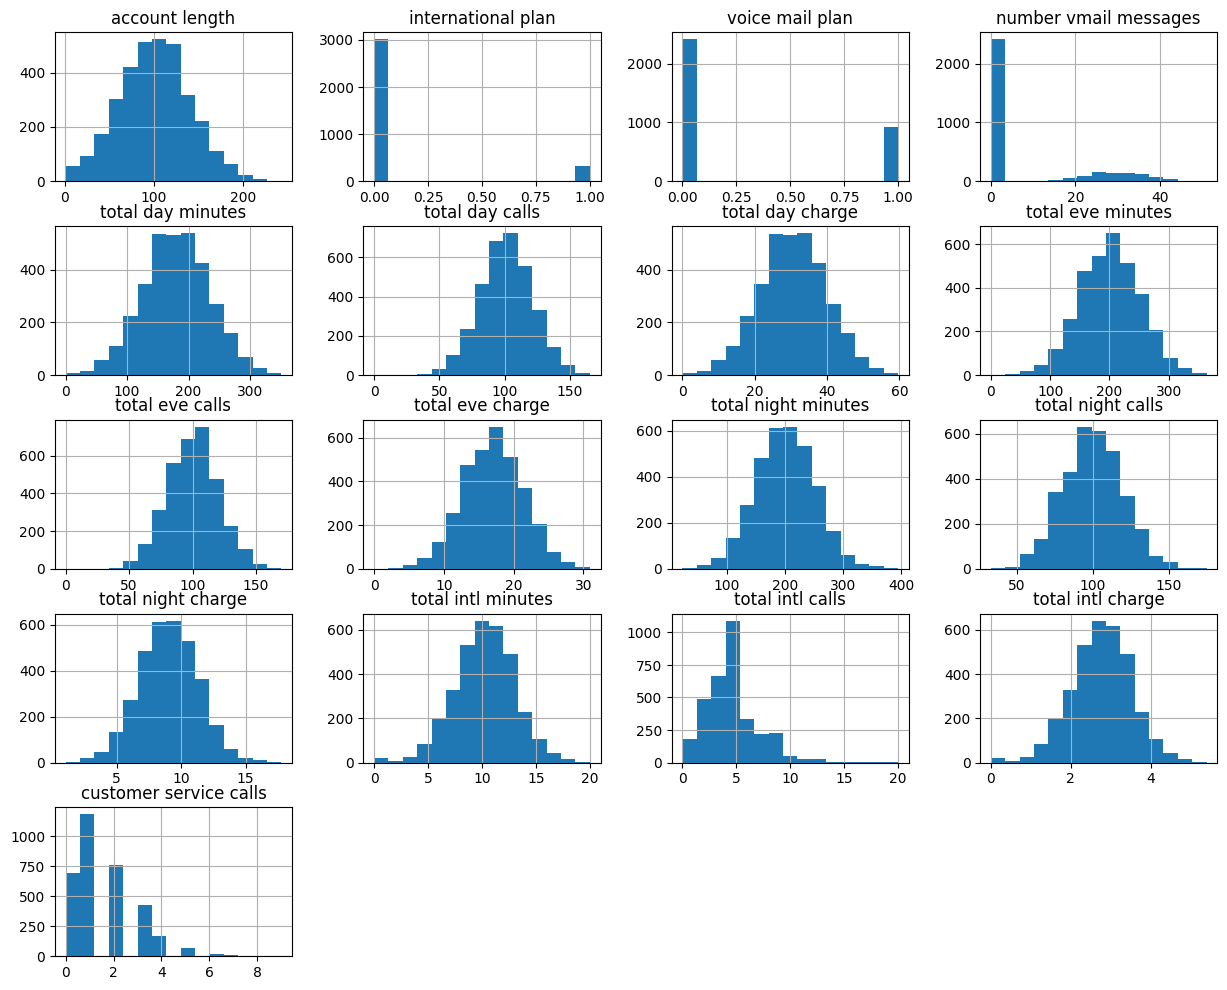

In [13]:
import matplotlib.pyplot as plt

# check distribution of values
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [14]:
# check classes ratio
df_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

The distributions tell us:

Most customers don't use voice mail service and international plans.
Half of the customers live in area code 415.
The company earns more by total day calls (check total day charge).
We have an imbalanced dataset which could be tricky when choosing evaluation metrics.

<Axes: >

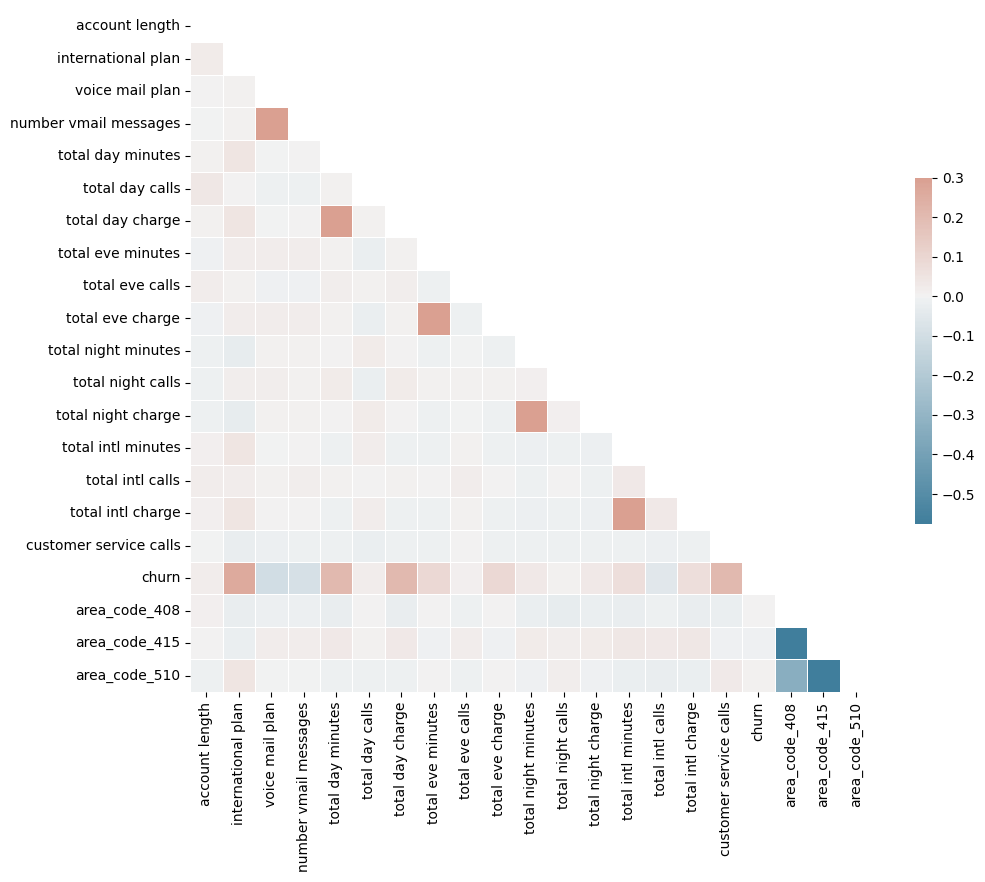

In [15]:
# some insights into the relationship between features
# observe the correlation.

import matplotlib.pyplot as plt
import seaborn as sns

# it could take some time to run this cell since we are calculating correlation matrix in a dimesion of (100x100)
# to have a better visualization, we will take only one triangle 
# because other trangle is only its symmetry (i.e a x b and b x a)

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, we observe the following things:

- There is a positive correlation between:
    - total day charge, total day minutes, and churn
    - total eve minutes and total eve charge
    - total night minutes and total night charge
    - total intl minutes and total intl charge
    - total customer service calls and churn
    - number vmail messages and voice mail
    - international plan and churn

- There is a negative correlation between:
    - churn and voice mail plan
    - churn and number vmail messages
    - churn and total intl calls


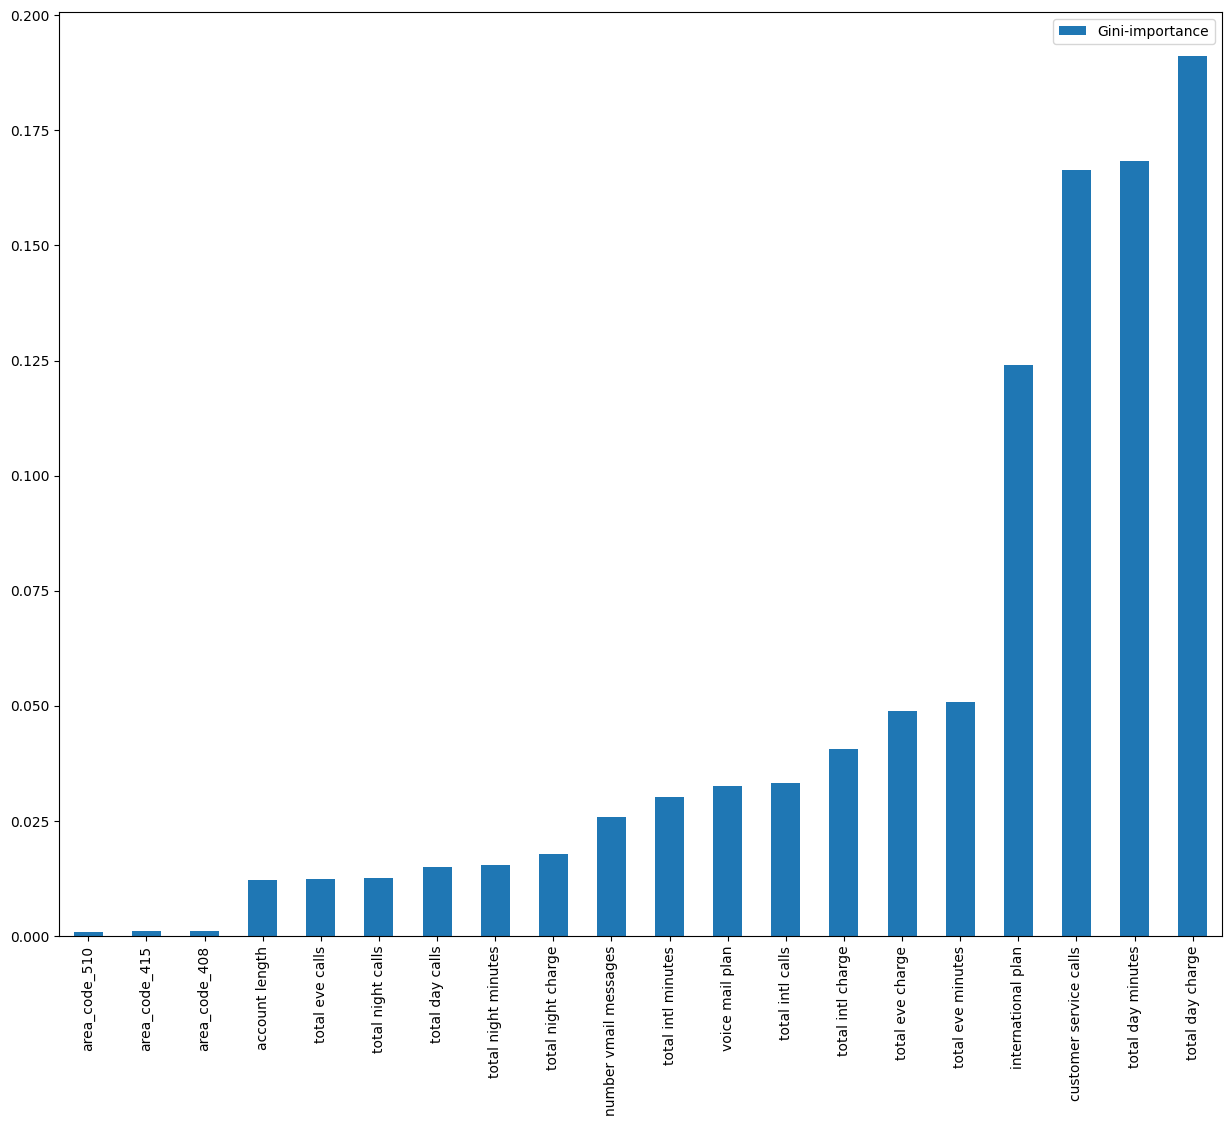

In [16]:
"""check feature importances via random forest classifier"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.

# Train/Test Split

In this notebook, we will mostly apply machine learning methods for the given problem. Therefore, we will prefer to use an 80%-20% split since it is used as the most common ratio in applications (not including Deep Learning). Furthermore, we have an imbalanced dataset in terms of class distributions. We can use stratify option of `train_test_split()` function of sklearn to split data to train and test datasets with the same distribution and be sure that samples of the test or train dataset are not only formed by the majority class.


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

In [18]:
X = df_final.drop(columns=["churn"])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Predictive Model

 # Metrics

This is a classification task, and the most commonly used metric is accuracy. But, we have an imbalanced dataset, which means we need to be careful about our evaluations. F1 score balances the precision and recall so we can have a good metric even for imbalanced datasets. Hence, we will use accuracy and the F1 score while comparing the performance of different algorithms.

In [20]:
from sklearn.metrics import f1_score

# Model Results

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier  # removed
# from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # removed
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",  # removed
    "Decision Tree",
    "Random Forest",
    # "Neural Net",  # removed MLP
    "AdaBoost",
    "Naive Bayes",
    # "QDA",  # removed
    "XGBoost",
    "LightGBM"
]

classifiers = [
    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),  # removed
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    # MLPClassifier(alpha=1, max_iter=1000, random_state=42),  # removed
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    # QuadraticDiscriminantAnalysis(),  # removed
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]


# Classical Machine Learning Models

In [22]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.72 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.94 f1_score: 0.86 Model: Decision Tree
accuracy: 0.90 f1_score: 0.73 Model: Random Forest


/Users/deliorincon/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy: 0.88 f1_score: 0.70 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.96 f1_score: 0.91 Model: XGBoost
[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start training from score -1.788263


/Users/deliorincon/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:46:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


accuracy: 0.95 f1_score: 0.89 Model: LightGBM


accuracy: 0.95 f1_score: 0.89


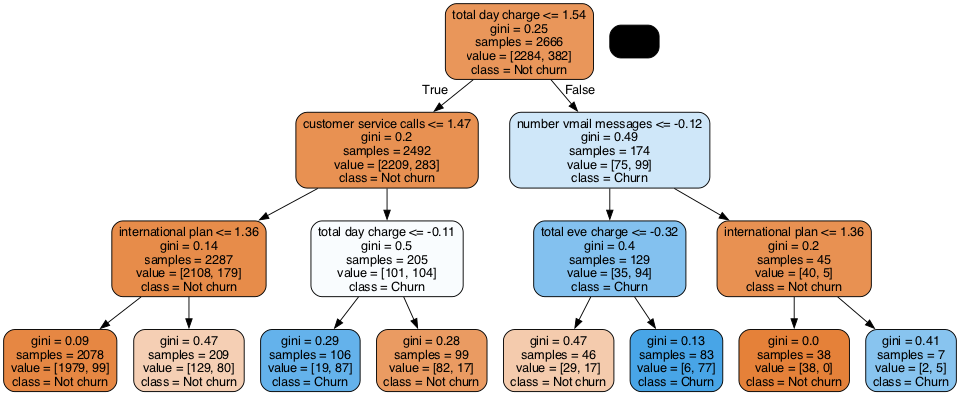

In [23]:
"""visualize the Decision Tree and see how tree-based algorithms decide for this particular problem"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth,criterion_type,split_type) :
    
 
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_final.drop(columns=["churn"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True,
                                       
                  )
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)
    
plot_decision_tree(3,"gini","best")

# Deep Learning Model

What would be the performance of Artificial Neural Network (ANN) for the given problem (without spending hours on hyperparameter optimization - just experimenting)?



In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, f1_score

# reproducibility
tf.random.set_seed(42)
np.random.seed(42)
# ✅ Imports (use TF Keras)
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# ✅ Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ✅ Model
clf = Sequential([
    Dense(6, activation='relu', kernel_initializer='glorot_uniform', input_dim=X.shape[1]),
    Dense(6, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train (capture history; suppress auto-display with semicolon)
history = clf.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0);

# ✅ Evaluate (train)
loss_tr, acc_tr = clf.evaluate(X_train, y_train, batch_size=10, verbose=0)
print('Train accuracy:', acc_tr)

# ✅ Predict (flatten)
proba = clf.predict(X_test, batch_size=32, verbose=0).ravel()
y_pred = (proba > 0.5).astype(int)

# ✅ Evaluate (test)
loss_te, acc_te = clf.evaluate(X_test, y_test, batch_size=10, verbose=0)
print('*' * 20)
print('Test accuracy:', acc_te)

# ✅ Confusion matrix + F1
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Test F1-score:', f1_score(y_test, y_pred))          # binary by default
# Optional:
# print(classification_report(y_test, y_pred))




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instan

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instan

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/deliorincon/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/deliorincon/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instan

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
# to have reproducible results
import tensorflow 
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)


The performance of ANN couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.

#### 